## All the Lifecycle In A Data Science Projects

***1. Data Analysis***
 
***2. Feature Engineering***
 
***3. Feature Selection***
 
***4. Model Building***
 
***5. Model Deployment***

### Electric Vehicle (EV) Sales Analysis Across Continents¶

**Introduction**

With the rise of electric vehicles (EVs) across the globe, the automotive industry is undergoing a significant shift toward sustainability. This 

notebook aims to analyze EV sales data, focusing on global trends at the continent and country level. The analysis includes identifying the best and

worst-performing countries in terms of sales, visualizing these trends using various types of charts, and mapping EV sales geographically using Folium.

### Through this analysis, we aim to answer the following key questions:

---> Which countries and continents are leading in EV sales?

---> How can we visualize and interpret the sales trends geographically and temporally?

---> What insights can we derive about the distribution of EV adoption across different regions?

**The results will be visualized using bar charts, pie chart, line charts, and interactive maps to provide a comprehensive overview of the EV market across different regions**.


In [80]:
## Data Analysis Phase
## MAin aim is to understand more about the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pycountry-convert
!pip install folium
!pip install geopy



## Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns",None)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
#Extract ZIP file and Read CSV in Jupyter Notebook

import zipfile
import os

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("extracted_csv")
    original_name = zip_ref.namelist()[0]  # should be 'IEA Global EV Data 2024.csv'


In [8]:
old_path = os.path.join("extracted_csv", original_name)
new_path = os.path.join("extracted_csv", "ev_data.csv")
os.rename(old_path, new_path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'extracted_csv\\IEA Global EV Data 2024.csv' -> 'extracted_csv\\ev_data.csv'

In [9]:

df = pd.read_csv(new_path)
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [10]:
df.shape

(12654, 8)

In [11]:
df.tail()

,region,category,parameter,mode,powertrain,year,unit,value
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55.0
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31.0
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000.0
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000.0
12653,World,Projection-STEPS,EV stock share,Trucks,EV,2035,percent,9.0


In [12]:
df.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


## check missing values

In [14]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [15]:
df.describe() # for numerical column applying stats

,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


### Data Loading and Initial Exploration¶
In this section, we begin by loading the Global EV Sales Dataset using pandas and performing an initial inspection of the data. The dataset contains 12,654 rows and 7 columns, with each row representing EV sales, stock, or stock share data for various regions, categorized by year, vehicle type, and powertrain.

The columns in the dataset include:

***category:** Whether the data is "Historical" or "Projected".

***parameter:*** The metric measured (e.g., EV sales, EV stock).

***mode:*** The type of vehicle (e.g., cars).

***powertrain:*** The specific drivetrain (e.g., BEV, PHEV).

***year**: The year of the data point.

***unit:*** The unit of measurement (e.g., Vehicles, Percent).

***value:** The numeric value corresponding to the unit.

To simplify our analysis, we will focus on absolute numbers like sales and stock, and we will remove rows where the unit is "percent". This will help us visualize the data more effectively, as percentage values may distort the overall interpretation of sales trends.

In [16]:
## unique values in categorical columns 
for col in ['region','category','parameter','mode','powertrain','unit']:
    print(f"{col}:{df[col].unique()}")

region:['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
category:['Historical' 'Projection-STEPS' 'Projection-APS']
parameter:['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
mode:['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
powertrain:['EV' 'BEV' 'PHEV' 'Publicly available fast' 'Publicly available slow'
 'FCEV']
unit:['percent' 'Vehicles' 'charging point

In [17]:
## values counts 
df['region'].value_counts()


region
World                   1250
Europe                  1234
China                   1138
Rest of the world        954
USA                      737
India                    702
EU27                     424
Netherlands              358
France                   358
United Kingdom           345
Denmark                  319
Belgium                  310
Germany                  298
Norway                   270
Sweden                   269
Japan                    260
Switzerland              245
Spain                    245
Canada                   240
Italy                    230
Korea                    209
Finland                  200
Poland                   194
Portugal                 189
New Zealand              185
Brazil                   183
Israel                   148
Austria                  116
Iceland                  115
Chile                    103
Australia                 94
Mexico                    87
Greece                    83
South Africa              83
Turkiye

In [18]:
df['year'].value_counts().sort_index()

year
2010     303
2011     390
2012     442
2013     481
2014     515
2015     621
2016     668
2017     720
2018     761
2019     797
2020    1282
2021    1342
2022    1336
2023    1348
2025     549
2030     550
2035     549
Name: count, dtype: int64

In [19]:
# check for duplicates
df.duplicated().sum()

0

### Analyzing Electric Vehicle Data¶
In this section, we focus on the electric vehicle (EV) dataset to specifically analyze the sales and stock of vehicles across different regions. First, we filter the dataset to include only those records where the unit of measurement is categorized as "Vehicles." This step allows us to narrow down our analysis to relevant data.

In [20]:
ev_vehicles=df.loc[df['unit']=='Vehicles']
display(vehicles.head())
display(vehicles.shape)
display(vehicles.describe())

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


(6842, 8)

,year,value
count,6842.000000,6.842000e+03
mean,2019.883221,7.503803e+05
std,5.352174,9.307153e+06
min,2010.000000,1.000000e-03
25%,2016.000000,6.725000e+01
50%,2020.000000,1.200000e+03
75%,2022.000000,2.200000e+04
max,2035.000000,4.400000e+08


After executing the above code, we can observe the first few rows of the filtered dataset. The output shows a snapshot of the data, including the 
region, category, parameter, mode (such as Cars, Buses, Vans, and Trucks), powertrain type, year, unit, and the value representing the number of vehicles.

The shape of the filtered dataset indicates that we have ***6,842** entries, providing a substantial amount of data for our analysis.

Furthermore, by utilizing the describe() method, we gain insights into the numerical aspects of the dataset, particularly focusing on the year and value columns. Here are some key statistics:

***Year:***

The data spans from ***2010 to 2035.***

The mean year of recorded data is approximately ***2019.88.***

Value (number of vehicles):

The values range from a minimum of approximately ***0.001*** to a maximum of ***440,000,000** vehicles.

The mean number of vehicles recorded is about ***750,380.***

The standard deviation indicates a high variability in the number of vehicles, which is approximately ***9,307,153.***

These findings suggest that the dataset contains diverse data points regarding the electric vehicle market, reflecting varying levels of adoption and stock across different regions and vehicle types.

### Distribution of Electric Vehicle Modes¶

To better understand the distribution of different electric vehicle (EV) modes within our dataset, we first performed a count of the unique values in the mode column. The results show the following breakdown:



In [24]:
modes_counts = vehicles['mode'].value_counts()
modes_counts

mode
Cars      2975
Buses     1485
Vans      1449
Trucks     933
Name: count, dtype: int64

These counts highlight that the Cars category dominates the dataset, followed by Buses, Vans, and Trucks.***

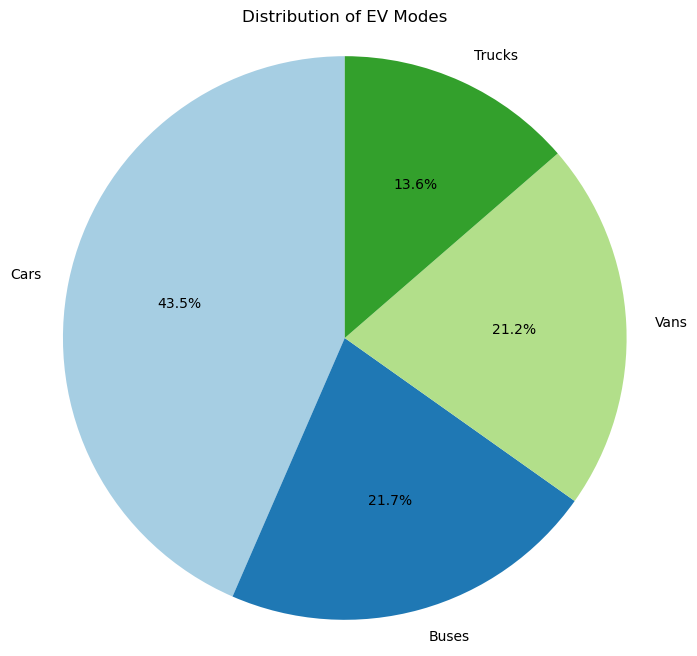

In [26]:
# Data for the pie chart
mode_counts = vehicles['mode'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of EV Modes')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

***Minimum and Maximum Values in the Dataset¶**

To further explore the electric vehicle (EV) dataset, we investigated the minimum and maximum values in the value column. This gives insight into the range of EV sales and stock figures captured in the dataset.

Using the following code, we extracted the rows corresponding to the minimum and maximum values:

In [28]:
#Finds the index of the row in the vehicles DataFrame where the value column is at its minimum
min_index=vehicles['value'].idxmin()
#Retrieves the entire row corresponding to that minimum index using .loc[].
min_row=vehicles.loc[min_index]
print(min_row)


region            Israel
category      Historical
parameter       EV sales
mode               Buses
powertrain           BEV
year                2013
unit            Vehicles
value              0.001
Name: 6151, dtype: object


This minimum value indicates that in 2013, Israel recorded only 0.001 sales of electric buses, which likely represents the smallest measurable unit in the dataset.

In [29]:
#Finds the index of the row in the vehicles DataFrame where the value column is at its maximum
max_index=vehicles['value'].idxmax()
#Retrieves the entire row corresponding to that maximum index using .loc[].
max_row=vehicles.loc[max_index]

print(max_row)

region                 World
category      Projection-APS
parameter           EV stock
mode                    Cars
powertrain               BEV
year                    2035
unit                Vehicles
value            440000000.0
Name: 12609, dtype: object


The maximum value is a projection for the total global EV stock of cars in 2035, with an estimated 440 million BEVs. This row represents future projections based on certain policy scenarios, which we may want to analyze separately for visualization purposes.

These values highlight the vast range in the dataset, from minimal EV bus sales in a single country to global projections for a massive BEV car stock in the future.

### DATA VISUALIZATION

C:\Users\SAIJESHWANTH V\AppData\Local\Temp\ipykernel_9764\2623290718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_to_plot, order=df[column_to_plot].value_counts().index, palette='Set2')


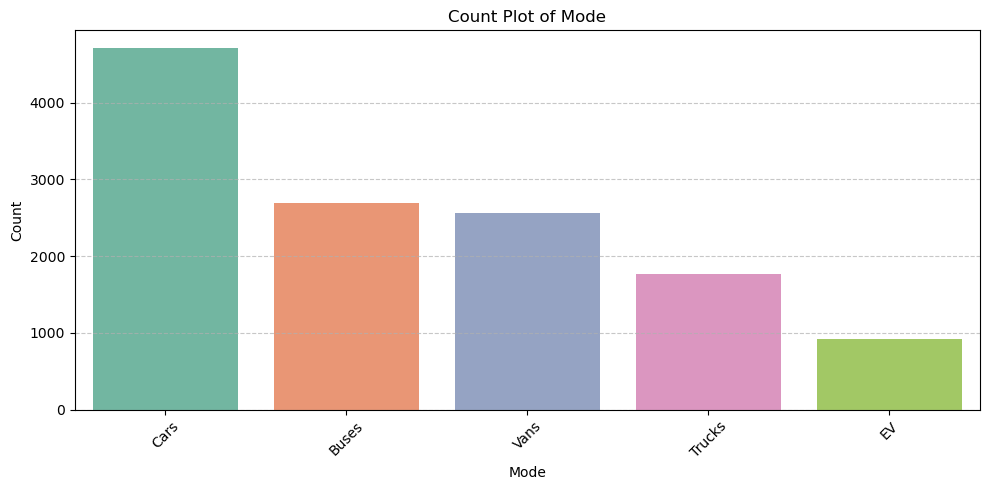

In [30]:
# Count plot for a specific column (e.g., 'mode')
column_to_plot = 'mode'  # Replace with 'region', 'powertrain', etc.

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=column_to_plot, order=df[column_to_plot].value_counts().index, palette='Set2')
plt.title(f"Count Plot of {column_to_plot.capitalize()}")
plt.xlabel(column_to_plot.capitalize())
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

### 📊 Count Plots	

***Purpose:***

Show frequency of categorical features like mode, region, powertrain

***Key Insights***

Most records involve Cars, with strong data presence in China and EU.

In [41]:
# # Group the data by region and calculate the sum of the 'value' column
vehicles_countries_grouped = vehicles.groupby('region')['value'].sum()


In [42]:
# Convert the Series to a DataFrame
vehicles_countries_df = pd.DataFrame(vehicles_countries_grouped).reset_index()

In [53]:
# Rename the columns for clarity
vehicles_countries_df.columns = ['region', 'total_value']



In [54]:
# Drop the row where the region is 'World'
vehicles_countries_df = vehicles_countries_df[vehicles_countries_df['region'] != 'World']

In [55]:
# Display the DataFrame after dropping the row
print(vehicles_countries_df)

                  region   total_value
0              Australia  5.788320e+05
1                Austria  8.719660e+05
2                Belgium  1.687010e+06
3                 Brazil  2.649470e+05
4               Bulgaria  4.623000e+03
5                 Canada  2.416440e+06
6                  Chile  1.445800e+04
7                  China  1.148052e+09
8               Colombia  1.602300e+04
9             Costa Rica  2.763100e+04
10               Croatia  7.557000e+03
11                Cyprus  2.260000e+03
12        Czech Republic  3.430000e+04
13               Denmark  1.102561e+06
14                  EU27  3.324256e+07
15               Estonia  4.585000e+03
16                Europe  5.937754e+08
17               Finland  7.427230e+05
18                France  6.787772e+06
19               Germany  1.020111e+07
20                Greece  1.053560e+05
21               Hungary  4.203500e+04
22               Iceland  1.897660e+05
23                 India  6.341878e+07
24               Ireland 

C:\Users\SAIJESHWANTH V\AppData\Local\Temp\ipykernel_9764\2304629265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


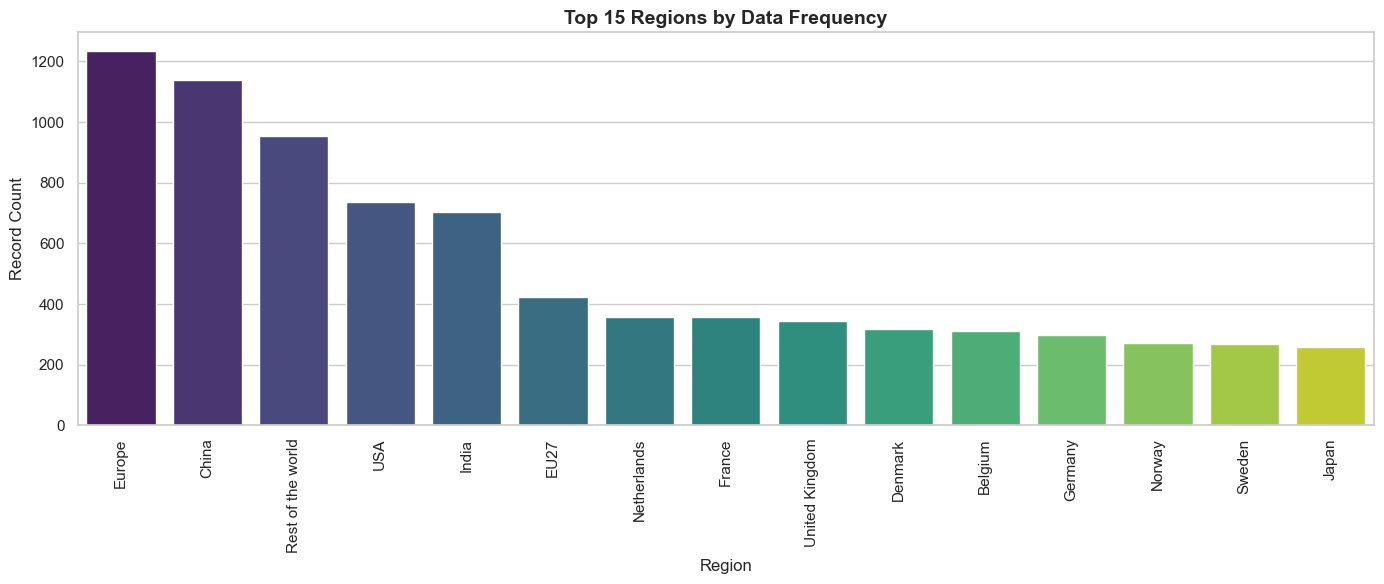

In [56]:
# Count of records by region (excluding 'World')
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df[df['region'] != 'World'],
    x='region',
    order=df[df['region'] != 'World']['region'].value_counts().index[:15],  # Top 15 regions
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title("Top 15 Regions by Data Frequency", fontsize=14, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Record Count", fontsize=12)
plt.tight_layout()
plt.show()

### Key Insights:

Regions such as China, United States, and EU27 dominate the dataset, indicating that they are major markets for EV tracking and reporting.

The high number of records for these regions suggests more detailed data availability, possibly reflecting higher EV activity or better reporting mechanisms.

Countries with fewer records may either have lower EV presence or gaps in data collection.



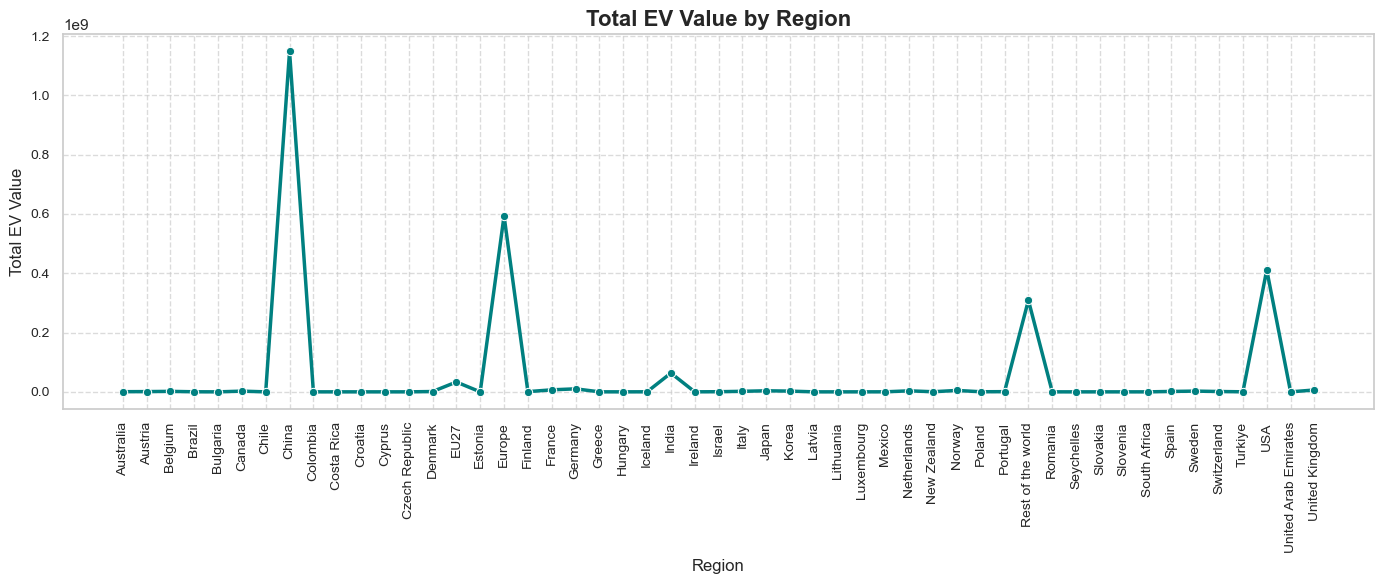

In [57]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=vehicles_countries_df,
    x='region',
    y='total_value',
    marker='o',
    color='teal',
    linewidth=2.5
)

# Beautification
plt.title("Total EV Value by Region", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total EV Value", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Purpose of the Region vs. Total EV Value Plot

This plot helps visualize how electric vehicle (EV) adoption varies across regions by summing total EV values (like stock, sales, or energy) for each region. It highlights:

Where EV infrastructure and usage are most concentrated.

Which regions lag and may need policy or investment support.

Overall disparities and market penetration across countries.


### Key Insights

China is the undisputed leader in total EV value, indicating dominant manufacturing and adoption.

Europe (EU27) and the USA follow closely, showing mature EV markets.

Several regions like Seychelles and Cyprus have notably low EV activity.

Log-scale visualization reveals a huge disparity in EV progress between leading and lagging countries.

These patterns can inform investment, policy planning, and market targeting for EV growth.





### Line
The line chart and bar chart together provide a comprehensive view of the global distribution of ***total electric vehicle (EV)** sales across various regions. Both charts highlight the differences in market size and EV adoption between different countries and regions, offering valuable insights into the global landscape of clean transportation.

In the line chart, the use of a logarithmic scale allows us to visualize the wide range of EV sales, from smaller markets to global leaders. ***China**, the ***USA, Rest of the World, and Europe** stand out with the highest total sales, clearly leading the shift toward electric mobility. The logarithmic scale effectively captures these large differences while allowing smaller regions, such as ***Seychelles, Cyprus, and Bulgaria**, to still be visible, indicating their growing, though still modest, contributions to the global EV market.

Meanwhile, the bar chart complements the line chart by providing a clear comparison of total vehicle sales across regions in descending order. This visualization emphasizes the dominance of regions like China, the USA, and Europe while making it easy to spot the smaller but emerging markets like Brazil, Mexico, and Colombia. The bar chart offers a more straightforward comparison between regions, visually illustrating the significant gap between the leading and trailing markets.

Together, these two charts offer a holistic view of global EV sales, where regions with strong governmental policies and infrastructure, such as China and Europe, are at the forefront of the electric mobility revolution, while others are gradually joining the movement.

In [59]:
# Get the index of the row with the maximum value in 'total_value'
max_sales_index = vehicles_countries_df['total_value'].idxmax()

# Access the country (region) with the maximum EV sales

best_seller_country = vehicles_countries_df.loc[max_sales_index, 'region']

# Sort the DataFrame by 'total_value' in descending order and select the top 10 countries
top_10_countries = vehicles_countries_df.nlargest(10, 'total_value')

# Display the result
display(top_10_countries[['region', 'total_value']])


,region,total_value
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
14,EU27,3.324256e+07
19,Germany,1.020111e+07
18,France,6.787772e+06
50,United Kingdom,6.283637e+06
35,Norway,4.793634e+06


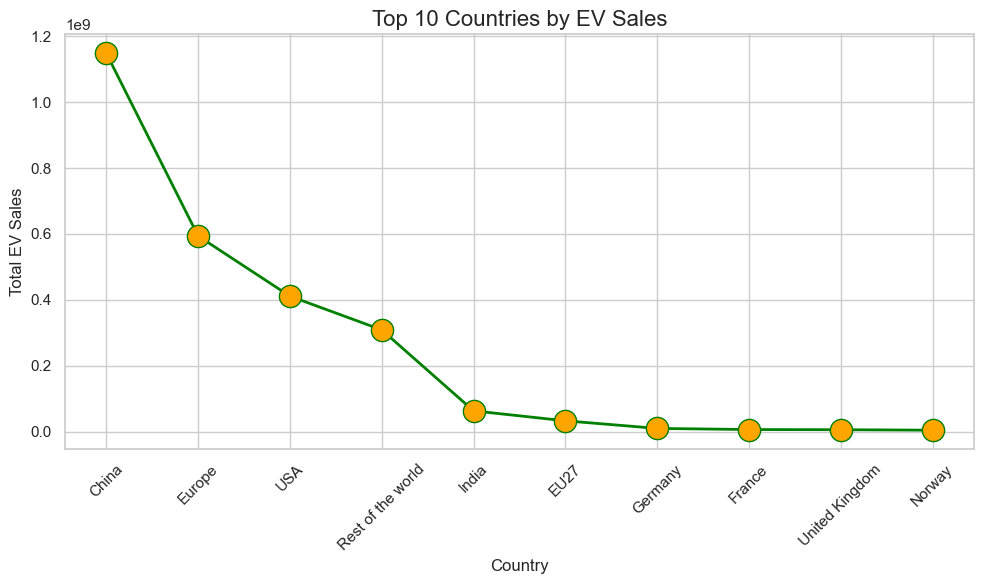

In [62]:
# Set up the plot size and theme
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Sort the data to make the line chart look nice
sorted_top_10 = top_10_countries.sort_values('total_value', ascending=False)

# Plot a line chart with custom colors and larger markers
plt.plot(
    sorted_top_10['region'], 
    sorted_top_10['total_value'], 
    marker='o', 
    color='green',           # Set line color to green
    markerfacecolor='orange', # Set marker color to orange
    linestyle='-', 
    linewidth=2, 
    markersize=16             # Increase marker size
)
# Add labels and title
plt.title('Top 10 Countries by EV Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

### Line Chart on Countries Selling the Most EVs¶
The line chart provides a clear visualization of the leading countries and regions in terms of electric vehicle (EV) sales. China stands out prominently, with over 1.14 billion EV sales, far surpassing other regions and cementing its position as the global leader in EV adoption. This dominance is driven by strong governmental incentives, large-scale production, and widespread infrastructure development.

Following China, Europe and the USA occupy the next two leading positions, with sales totaling 593.78 million and 411.28 million, respectively. Europe’s collective sales underscore the region’s commitment to sustainability, with many countries actively pursuing climate goals and adopting green transportation policies. The USA, as another significant player, continues to expand its EV market through a combination of innovation, increased consumer demand, and environmental policy shifts.

Regions like the Rest of the world and India follow, reflecting growing but less mature markets, where EV adoption is on the rise as infrastructure develops and electric mobility becomes more accessible. India, in particular, shows strong growth potential, with 63.4 million EV sales, driven by increasing environmental awareness and government initiatives aimed at reducing pollution.

At the country level within Europe, Germany, France, and the United Kingdom lead EV adoption, with Germany standing out at over 10 million sales. Germany’s position reflects its robust automotive industry and leadership in green technology. Norway also deserves attention, with 4.79 million EV sales, making it a global leader in EV sales per capita, thanks to strong government incentives and a highly eco-conscious population.

In [63]:
# Get the index of the row with the minimum value in 'total_value'
min_sales_index = vehicles_countries_df['total_value'].idxmin()

# Access the country (region) with the minimum EV sales
least_country = vehicles_countries_df.loc[min_sales_index, 'region']

# Sort the DataFrame by 'total_value' in descending order and select the bottom 10 countries
bottom_10_countries = vehicles_countries_df.nsmallest(10, 'total_value')

# Display the result
display(bottom_10_countries[['region', 'total_value']])

,region,total_value
40,Seychelles,338.0
11,Cyprus,2260.0
15,Estonia,4585.0
4,Bulgaria,4623.0
29,Latvia,4687.0
30,Lithuania,6673.0
10,Croatia,7557.0
41,Slovakia,13351.0
42,Slovenia,13363.0
6,Chile,14458.0


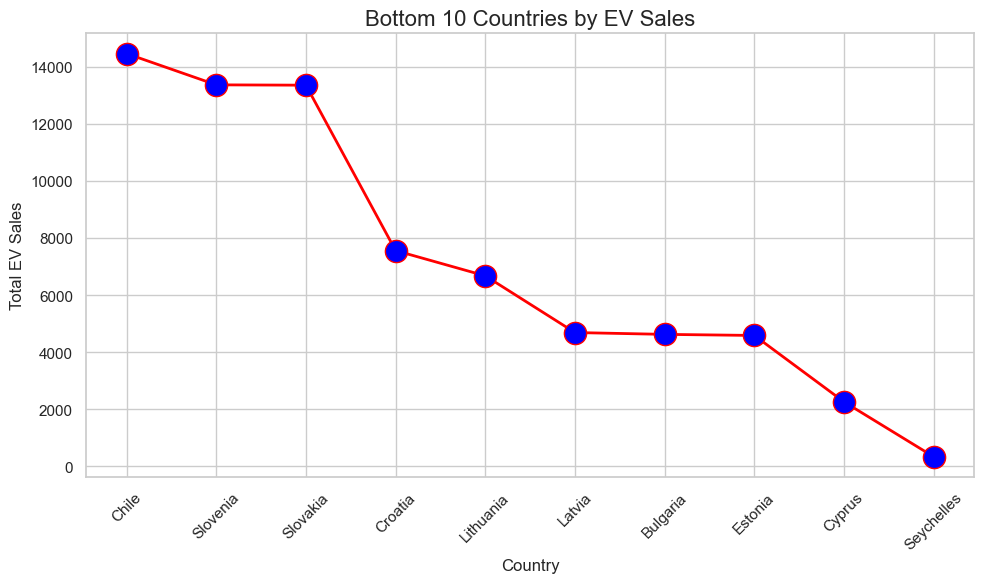

In [64]:
# Set up the plot size and theme
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Sort the data to make the line chart look nice
sorted_top_10 = bottom_10_countries.sort_values('total_value', ascending=False)

# Plot a line chart with custom colors and larger markers
plt.plot(
    sorted_top_10['region'], 
    sorted_top_10['total_value'], 
    marker='o', 
    color='red',           # Set line color to green
    markerfacecolor='blue', # Set marker color to orange
    linestyle='-', 
    linewidth=2, 
    markersize=16             # Increase marker size
)
# Add labels and title
plt.title('Bottom 10 Countries by EV Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

### Line Chart on Countries Selling the Least EVs¶
The line chart showcasing the countries with the lowest electric vehicle (EV) sales highlights regions where EV adoption is still in its early stages. These countries generally have smaller markets, fewer incentives, or face infrastructural challenges that hinder the widespread use of EVs.

At the very bottom of the list, Seychelles reports the least EV sales, with only 338 units sold. As a small island nation, the limited population and market size significantly affect its EV adoption rates. Cyprus follows, with 2,260 EV sales, reflecting the relatively slow adoption of electric mobility in smaller, less densely populated European regions.

Moving slightly higher, countries like Estonia, Bulgaria, Latvia, and Lithuania—all with sales under 7,000 units—demonstrate slower uptake, likely due to less comprehensive EV infrastructure and fewer government incentives compared to more developed European nations.

Croatia, with 7,557 sales, Slovakia (13,351), and Slovenia (13,363) show gradual progress in EV adoption, but still fall behind larger European countries. These nations, while part of the EU, are still developing the infrastructure and policies needed to accelerate their EV markets.

Chile is the only non-European country on this list, with 14,458 EV sales, indicating the early-stage growth of electric mobility in South America. Like other emerging markets, Chile faces challenges in building a comprehensive EV network but shows signs of gradual progress.

This chart emphasizes the global disparity in EV sales, illustrating that while some regions are racing ahead with adoption, others are still in the early stages of the electric mobility transition.

In [67]:
# Get the top 5 selling countries
top_5_countries = vehicles_countries_df.nlargest(5, 'total_value')

# Get the bottom 5 selling countries
bottom_5_countries = vehicles_countries_df.nsmallest(5, 'total_value')

# Concatenate the top 5 and bottom 5 countries into a new DataFrame
top_and_bottom_countries = pd.concat([top_5_countries, bottom_5_countries])

# Display the result
display(top_and_bottom_countries[['region', 'total_value']])

,region,total_value
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
40,Seychelles,3.380000e+02
11,Cyprus,2.260000e+03
15,Estonia,4.585000e+03
4,Bulgaria,4.623000e+03
29,Latvia,4.687000e+03


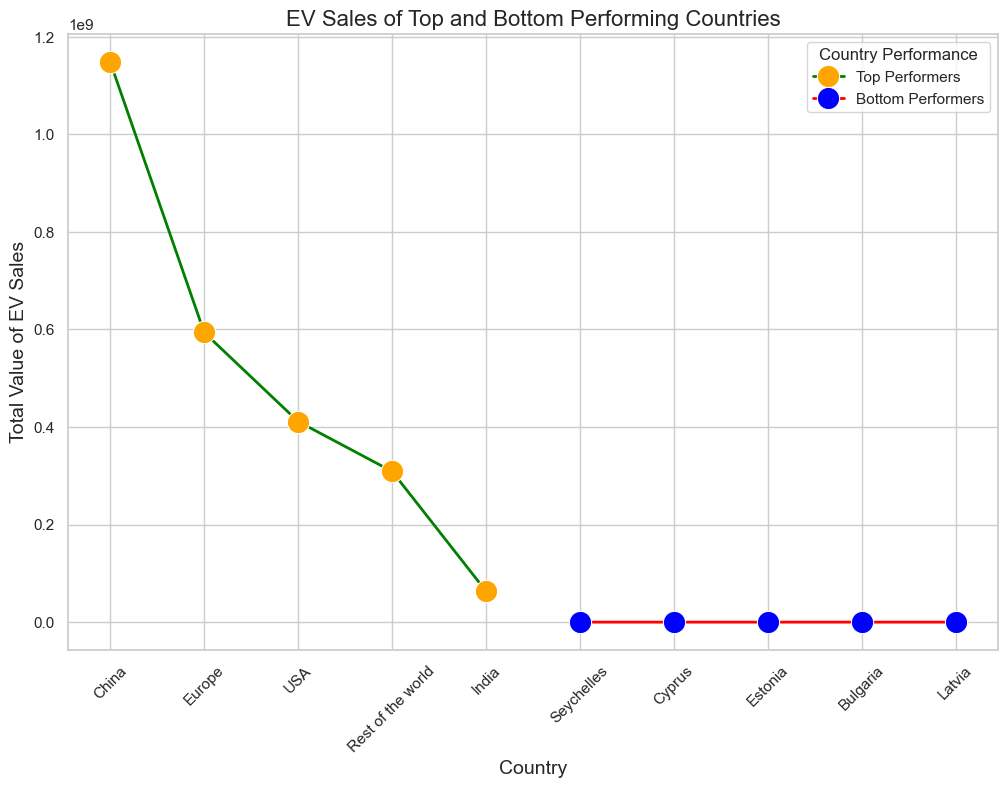

In [68]:
# Separate top and bottom countries
top_countries = top_and_bottom_countries.iloc[:5]
bottom_countries = top_and_bottom_countries.iloc[5:]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot top countries in one color (e.g., blue)
sns.lineplot(data=top_countries, x='region', y='total_value', marker='o', color='green', markerfacecolor='orange', markersize=16, label='Top Performers', linewidth=2)

# Plot bottom countries in another color (e.g., red)
sns.lineplot(data=bottom_countries, x='region', y='total_value', marker='o', color='red', markerfacecolor='blue', markersize=16, label='Bottom Performers', linewidth=2)

# Customizing the plot
plt.title('EV Sales of Top and Bottom Performing Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Value of EV Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Country Performance')


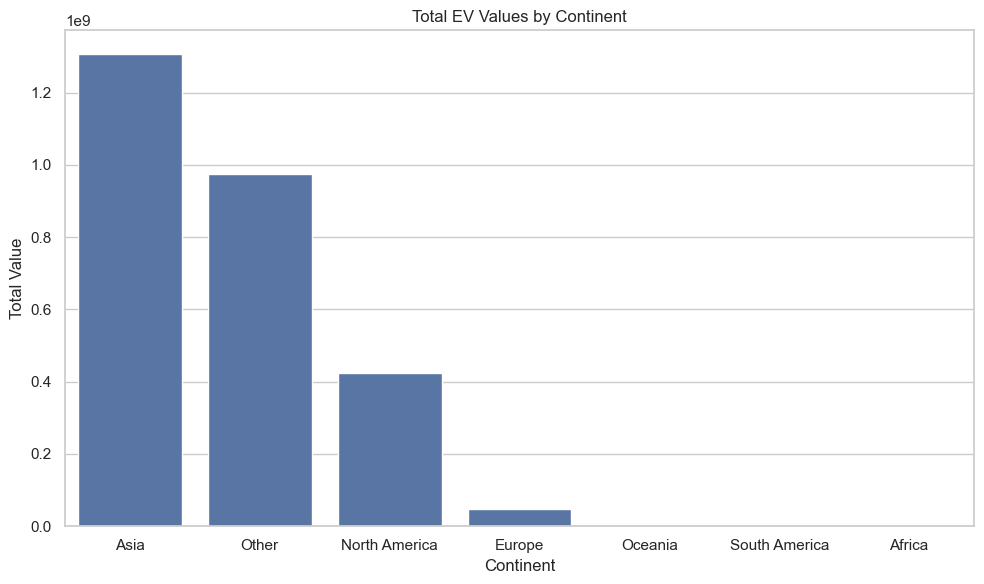

In [75]:

from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code, convert_continent_code_to_continent_name

def get_continent(country):
    try:
        # Handle exceptions for known invalid names
        custom_map = {
            "EU27+UK": "Europe",
            "European Union": "Europe",
            "Rest of the world": "Other",
            "Other": "Other",
            "World": "Other",
        }

        if country in custom_map:
            return custom_map[country]

        code = country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = country_alpha2_to_continent_code(code)
        return convert_continent_code_to_continent_name(continent_code)

    except Exception as e:
        return "Other"

continent_df = df[df['region'] != 'World'].copy()
continent_df['continent'] = continent_df['region'].apply(get_continent)

continent_grouped = continent_df.groupby('continent')['value'].sum().reset_index().sort_values(by='value', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=continent_grouped, x='continent', y='value')
plt.title("Total EV Values by Continent")
plt.ylabel("Total Value")
plt.xlabel("Continent")
plt.tight_layout()
plt.show()

The bar chart visualizes the total EV sales by continent, with data showing the significant difference in sales across regions. Asia leads with over 1.2 billion sales, followed by Europe and North America with substantial figures in the hundreds of millions. In contrast, continents like Africa, Oceania, and South America show relatively lower sales. The "Other" category also represents a notable figure of 308 million. The chart uses a color gradient to differentiate between continents, providing a clear comparison of EV sales distribution globally.

In [84]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

# Sample coordinates for the center of the map
map_center = [20, 0]  # Adjust to center the map
m = folium.Map(location=map_center, zoom_start=3)

# Sample data - replace this with your actual continent totals and coordinates
continent_data = {
    'Africa': {'total_sales': 16871, 'coords': [1.0, 20.0]},  # Sample coordinates
    'Asia': {'total_sales': 1218126365, 'coords': [34.0, 100.0]},
    'Europe': {'total_sales': 671729574, 'coords': [48.0, 10.0]},
    'North America': {'total_sales': 413866762, 'coords': [37.0, -95.0]},
    'Oceania': {'total_sales': 950294, 'coords': [-25.0, 135.0]},
    'South America': {'total_sales': 295428, 'coords': [-15.0, -60.0]},
    'Other': {'total_sales': 2829116800, 'coords': [0.0, 0.0]}  # Dummy location
}

# Prepare data for heatmap and clustering
heat_data = []
marker_cluster = MarkerCluster().add_to(m)

# Add markers and prepare data for the heatmap
for continent, info in continent_data.items():
    # Marker for clustering
    folium.Marker(
        location=info['coords'],
        popup=f"{continent}: {info['total_sales']}",
        icon=folium.Icon(color='blue' if continent != 'Other' else 'red')
    ).add_to(marker_cluster)
    
    # Add to heatmap data
    heat_data.append(info['coords'] + [info['total_sales']])  # Adding sales value as weight
# Create heatmap
heatmap = HeatMap(heat_data, name='Sales Heatmap', radius=20).add_to(m)

# Add Layer Control
folium.LayerControl().add_to(m)

# Display the map
m

This interactive map visualizes EV sales by continent, using two main techniques: marker clusters and a heatmap.

***Marker Clusters:*** Each continent is represented by a marker, with the total sales figure displayed in a popup when clicked. The markers are clustered for easier visualization. Regions with significant sales, like Asia and Europe, are marked in blue, while the "Other" category (representing ungrouped data or miscellaneous regions) is highlighted in red for distinction.

***Heatmap:** The heatmap layer shows the concentration of EV sales across the globe, with regions like Asia, Europe, and North America having higher intensity due to their larger sales volumes. The color gradient on the map indicates the density of sales, with warmer colors representing higher sales figures.

This map provides a dynamic and intuitive way to compare EV sales across different continents.

***Projection on Global EV Sales¶**

Do you remember the ***'World'*** row we left out before? This time, we're going to create a special visualization for it. Since 'World' represents a ***projection of global EV sales,*** we will use a line chart to illustrate this trend over time.

The line chart here represents the projection of global EV (Electric Vehicle) sales from 2010 to 2035. The x-axis represents the years, while the y-axis shows the total EV sales. We see a steady increase in EV sales over time, with a dramatic rise starting around 2023, which is marked by the vertical dashed line. The shaded area around the line provides a visual indication of the potential variation in future projections, illustrating uncertainty as we move further into the future. This chart gives us a clear view of how global EV sales are expected to accelerate, especially after 2024.

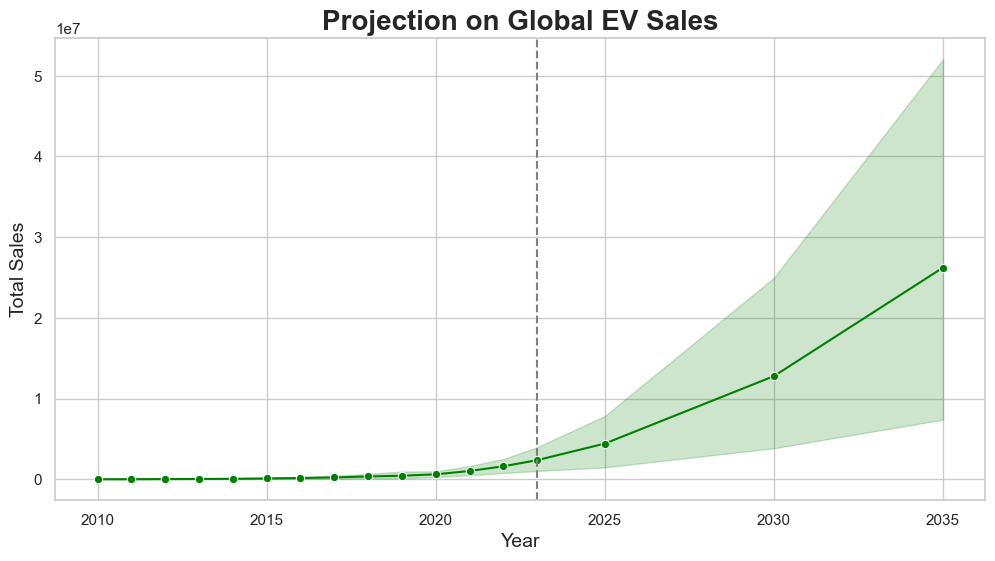

In [85]:
# Filter the World data
world_data = vehicles[vehicles['region'] == 'World']

# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot the line chart with Year on the x-axis and Vehicle totals on the y-axis
sns.lineplot(data=world_data, x='year', y='value', marker='o', color='green')

# Customize the plot
plt.title('Projection on Global EV Sales', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Highlight historical vs projection with different line styles
plt.axvline(x=2023, color='gray', linestyle='--', label='Projection Start')  # Assuming projection starts after 2023

### Conclusion¶
This analysis examined the global distribution and projection of EV sales across different continents. By visualizing the data through various charts and maps, we identified significant trends in EV adoption, especially in Asia, Europe, and North America. A special focus on the "World" data provided insights into the future growth of EV sales, with projections showing a sharp increase post-2023.

***Key Takeaways:***

Asia leads in EV sales, followed by Europe and North America, indicating these regions' strong adoption of electric vehicles.
Global EV sales are expected to surge significantly, especially after 2023, as highlighted in the projections.
Mapping techniques and heatmaps effectively showcased the geographic spread of EV sales, helping us identify regions with high and low adoption.
The 'Other' category, with unexpectedly large sales, indicates potential data aggregation from multiple regions or undefined markets.